### 1. Data Pre-processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
working_direc = '/content/drive/MyDrive/Data_Science/Projects/Computer_Vision/Human-Emotion-Detection/'
train_direc = working_direc +'Emotions Dataset/train'
val_direc = working_direc +'Emotions Dataset/test'
CLASS_NAMES = ["angry", "happy", "sad"]

CONFIGURATIONS = {
    'BATCH_SIZE':32,
    'IM_SIZE': 256,
    'LEARNING_RATE': 0.001,
    'N_EPOCH': 20,
    'DROPOUT_RATE':0.0,
    'REGULARIZTION_RATE': 0.0,
    'N_FILTERS':6,
    'KERNEL_SIZE':3,
    'N_STRIDES':1,
    'POOL_SIZE':2,
    'N_DENSE_1': 100,
    'N_DENSE_2': 10,
    'NUM_CLASSES':3
}

In [12]:
import tensorflow as tf

In [38]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_direc,
    labels = 'inferred',
    label_mode ='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size =CONFIGURATIONS['BATCH_SIZE'],
    image_size =(CONFIGURATIONS['IM_SIZE'], CONFIGURATIONS['IM_SIZE']),
    shuffle = True,
    seed =99
)

Found 2491 files belonging to 3 classes.


In [42]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_direc,
    labels = 'inferred',
    label_mode ='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size =CONFIGURATIONS['BATCH_SIZE'],
    image_size =(CONFIGURATIONS['IM_SIZE'], CONFIGURATIONS['IM_SIZE']),
    shuffle = True,
    seed =99
)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

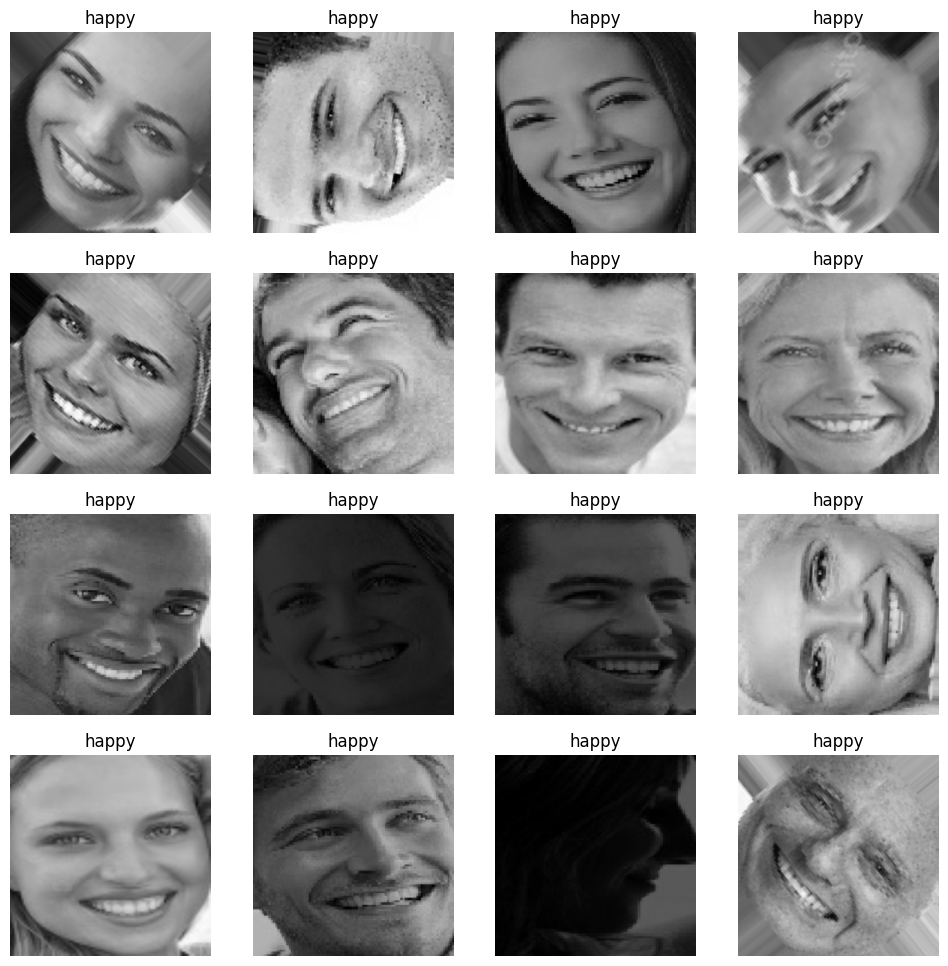

In [31]:
plt.figure(figsize =(12,12))

for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.0)
    plt.title(CLASS_NAMES[labels.numpy()[i]])
    plt.axis('off')

In [43]:
training_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
validation_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

### 2. Modeling

In [44]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, InputLayer, MaxPool2D, BatchNormalization, Dropout, Rescaling, Resizing
from tensorflow.keras.regularizers import L1, L2

In [45]:
LeNet_Model = tf.keras.Sequential([

    InputLayer(input_shape = (CONFIGURATIONS['IM_SIZE'], CONFIGURATIONS['IM_SIZE'], 3)),
    Rescaling(1.0/255.0, name='rescaling'),

    Conv2D(filters =CONFIGURATIONS['N_FILTERS'], kernel_size = CONFIGURATIONS['KERNEL_SIZE'], strides =CONFIGURATIONS['N_STRIDES'],
           padding='valid', activation ='relu', kernel_regularizer = L2(CONFIGURATIONS['REGULARIZTION_RATE'])),
    BatchNormalization(),
    MaxPool2D(pool_size =CONFIGURATIONS['POOL_SIZE'], strides =CONFIGURATIONS['N_STRIDES']*2),
    Dropout(rate = CONFIGURATIONS['DROPOUT_RATE']),

    Conv2D(filters =CONFIGURATIONS['N_FILTERS']*2 + 4, kernel_size=CONFIGURATIONS['KERNEL_SIZE'], strides =CONFIGURATIONS['N_STRIDES'],
           padding = 'valid', activation ='relu', kernel_regularizer = L2(CONFIGURATIONS['REGULARIZTION_RATE'])),
    BatchNormalization(),
    MaxPool2D(pool_size =CONFIGURATIONS['POOL_SIZE'], strides =CONFIGURATIONS['N_STRIDES']*2),
    Dropout(rate = CONFIGURATIONS['DROPOUT_RATE']),

    Flatten(),
    Dense(CONFIGURATIONS['N_DENSE_1'], activation='relu', kernel_regularizer = L2(CONFIGURATIONS['REGULARIZTION_RATE'])),
    BatchNormalization(),
    Dense(CONFIGURATIONS['N_DENSE_2'], activation='relu', kernel_regularizer = L2(CONFIGURATIONS['REGULARIZTION_RATE'])),
    BatchNormalization(),
    Dense(CONFIGURATIONS['NUM_CLASSES'], activation='softmax')
])

In [46]:
LeNet_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 254, 254, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 6)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 127, 127, 6)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 16)     